In [20]:
import numpy as np
from GPy.core.mapping import Mapping
from GPy.core.parameterization import Param 

class SinSum(Mapping):

    def __init__(self, input_dim, output_dim, a, b, c, name='linmap', value=0.0):
        super(SinSum, self).__init__(input_dim=input_dim, output_dim=output_dim, name=name)
        self.A = Param('A', np.ones((self.input_dim, self.output_dim)) * a)
        self.B = Param('B', np.ones((self.input_dim, self.output_dim)) * b)
        self.C = Param('C', np.ones((self.input_dim, self.output_dim)) * c)
        self.D = Param('D', value)

        #self.link_parameter(self.A)
        #self.link_parameter(self.B)
        #self.link_parameter(self.C)
        self.link_parameter(self.D)

    def f(self, X):
        return self.D
        #return self.A * np.cos(X) + self.B * np.cos(2 * X) + self.C * np.cos(3 * X) + self.D

    def update_gradients(self, dL_dF, X):
        self.D.gradient = dL_dF.sum(0)
        #self.A.gradient = (np.cos(X) * dL_dF).sum(0)
        #self.B.gradient = (np.cos(2 * X) * dL_dF).sum(0)
        #self.C.gradient = (np.cos(3 * X) * dL_dF).sum(0)
        
    def gradients_X(self, dL_dF, X):
        print(np.dot(dL_dF, self.A * self.B * np.cos(self.B * X)))
        return np.dot(dL_dF, self.A * self.B * np.cos(self.B * X))


  linmap.  |  value  |  constraints  |  priors
  D        |    0.0  |               |        


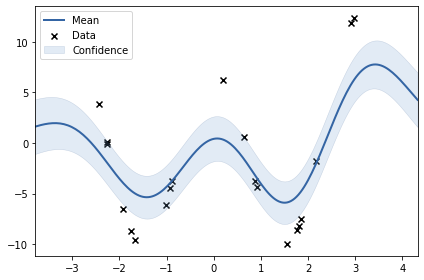

In [21]:
import GPy

X = np.random.uniform(-3.,3.,(20,1))
Y = -3 * np.cos(X) + 10 * np.cos(2 * X)# + np.random.randn(20,1)*0.05
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
mf = SinSum(1, 1, 1, 1, 1)
m = GPy.models.GPRegression(X,Y,kernel, mean_function=mf)
m.plot()
print(mf)


Name : gp
Objective : 2480.794522389622
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  gp.                      |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


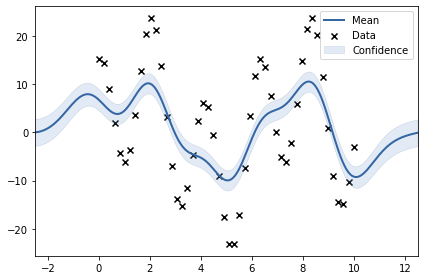

In [17]:
mf = GPy.core.Mapping(1,1)
mf.f =  np.sin
mf.update_gradients = lambda a,b: None
X = np.linspace(0,10,50).reshape(-1,1)
Y =  10 * np.sin(X) + 15*np.cos(3*X) + 0.1*np.random.randn(*X.shape)

k =GPy.kern.RBF(1)
lik = GPy.likelihoods.Gaussian()
m = GPy.core.GP(X, Y, kernel=k, likelihood=lik, mean_function=mf)
m.plot()
print(m)